In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = "/content/UTKFACE"

In [ ]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR,filename)
    temp = filename.split("_")
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/1043 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame()
df["image"], df["age"], df["gender"] = image_paths, age_labels, gender_labels
df.head(5)

image  age  gender
0  /content/UTKFACE/18_1_0_20170109213010399.jpg....   18       1
1  /content/UTKFACE/24_1_0_20170116214235749.jpg....   24       1
2  /content/UTKFACE/38_0_1_20170117005920398.jpg....   38       0
3  /content/UTKFACE/39_0_0_20170113183735128.jpg....   39       0
4  /content/UTKFACE/38_0_1_20170113195941277.jpg....   38       0

In [ ]:
gender_dict = {0:"Male",1:"Female"}

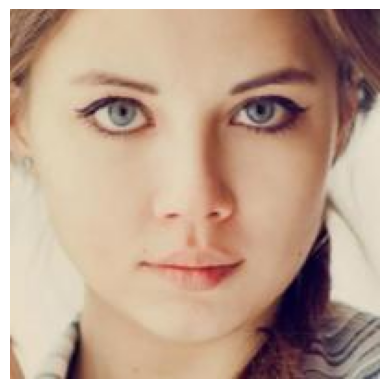

In [ ]:
from PIL import Image
img = Image.open(df["image"][0])
plt.axis("off")
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

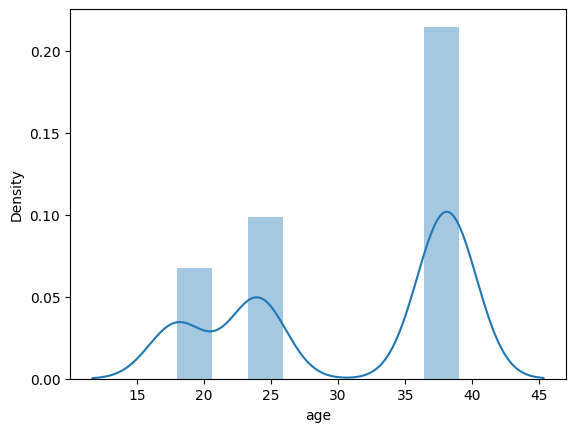

In [ ]:
sns.distplot(df["age"])

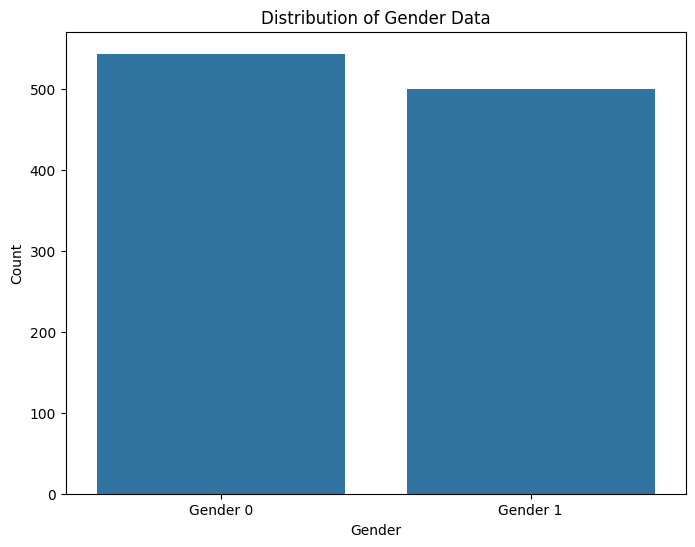

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


gender_data = df["gender"]

# Count the occurrences of each gender category
gender_counts = gender_data.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Gender 0', 'Gender 1'])  # Assuming 0 represents one gender and 1 represents the other
plt.show()


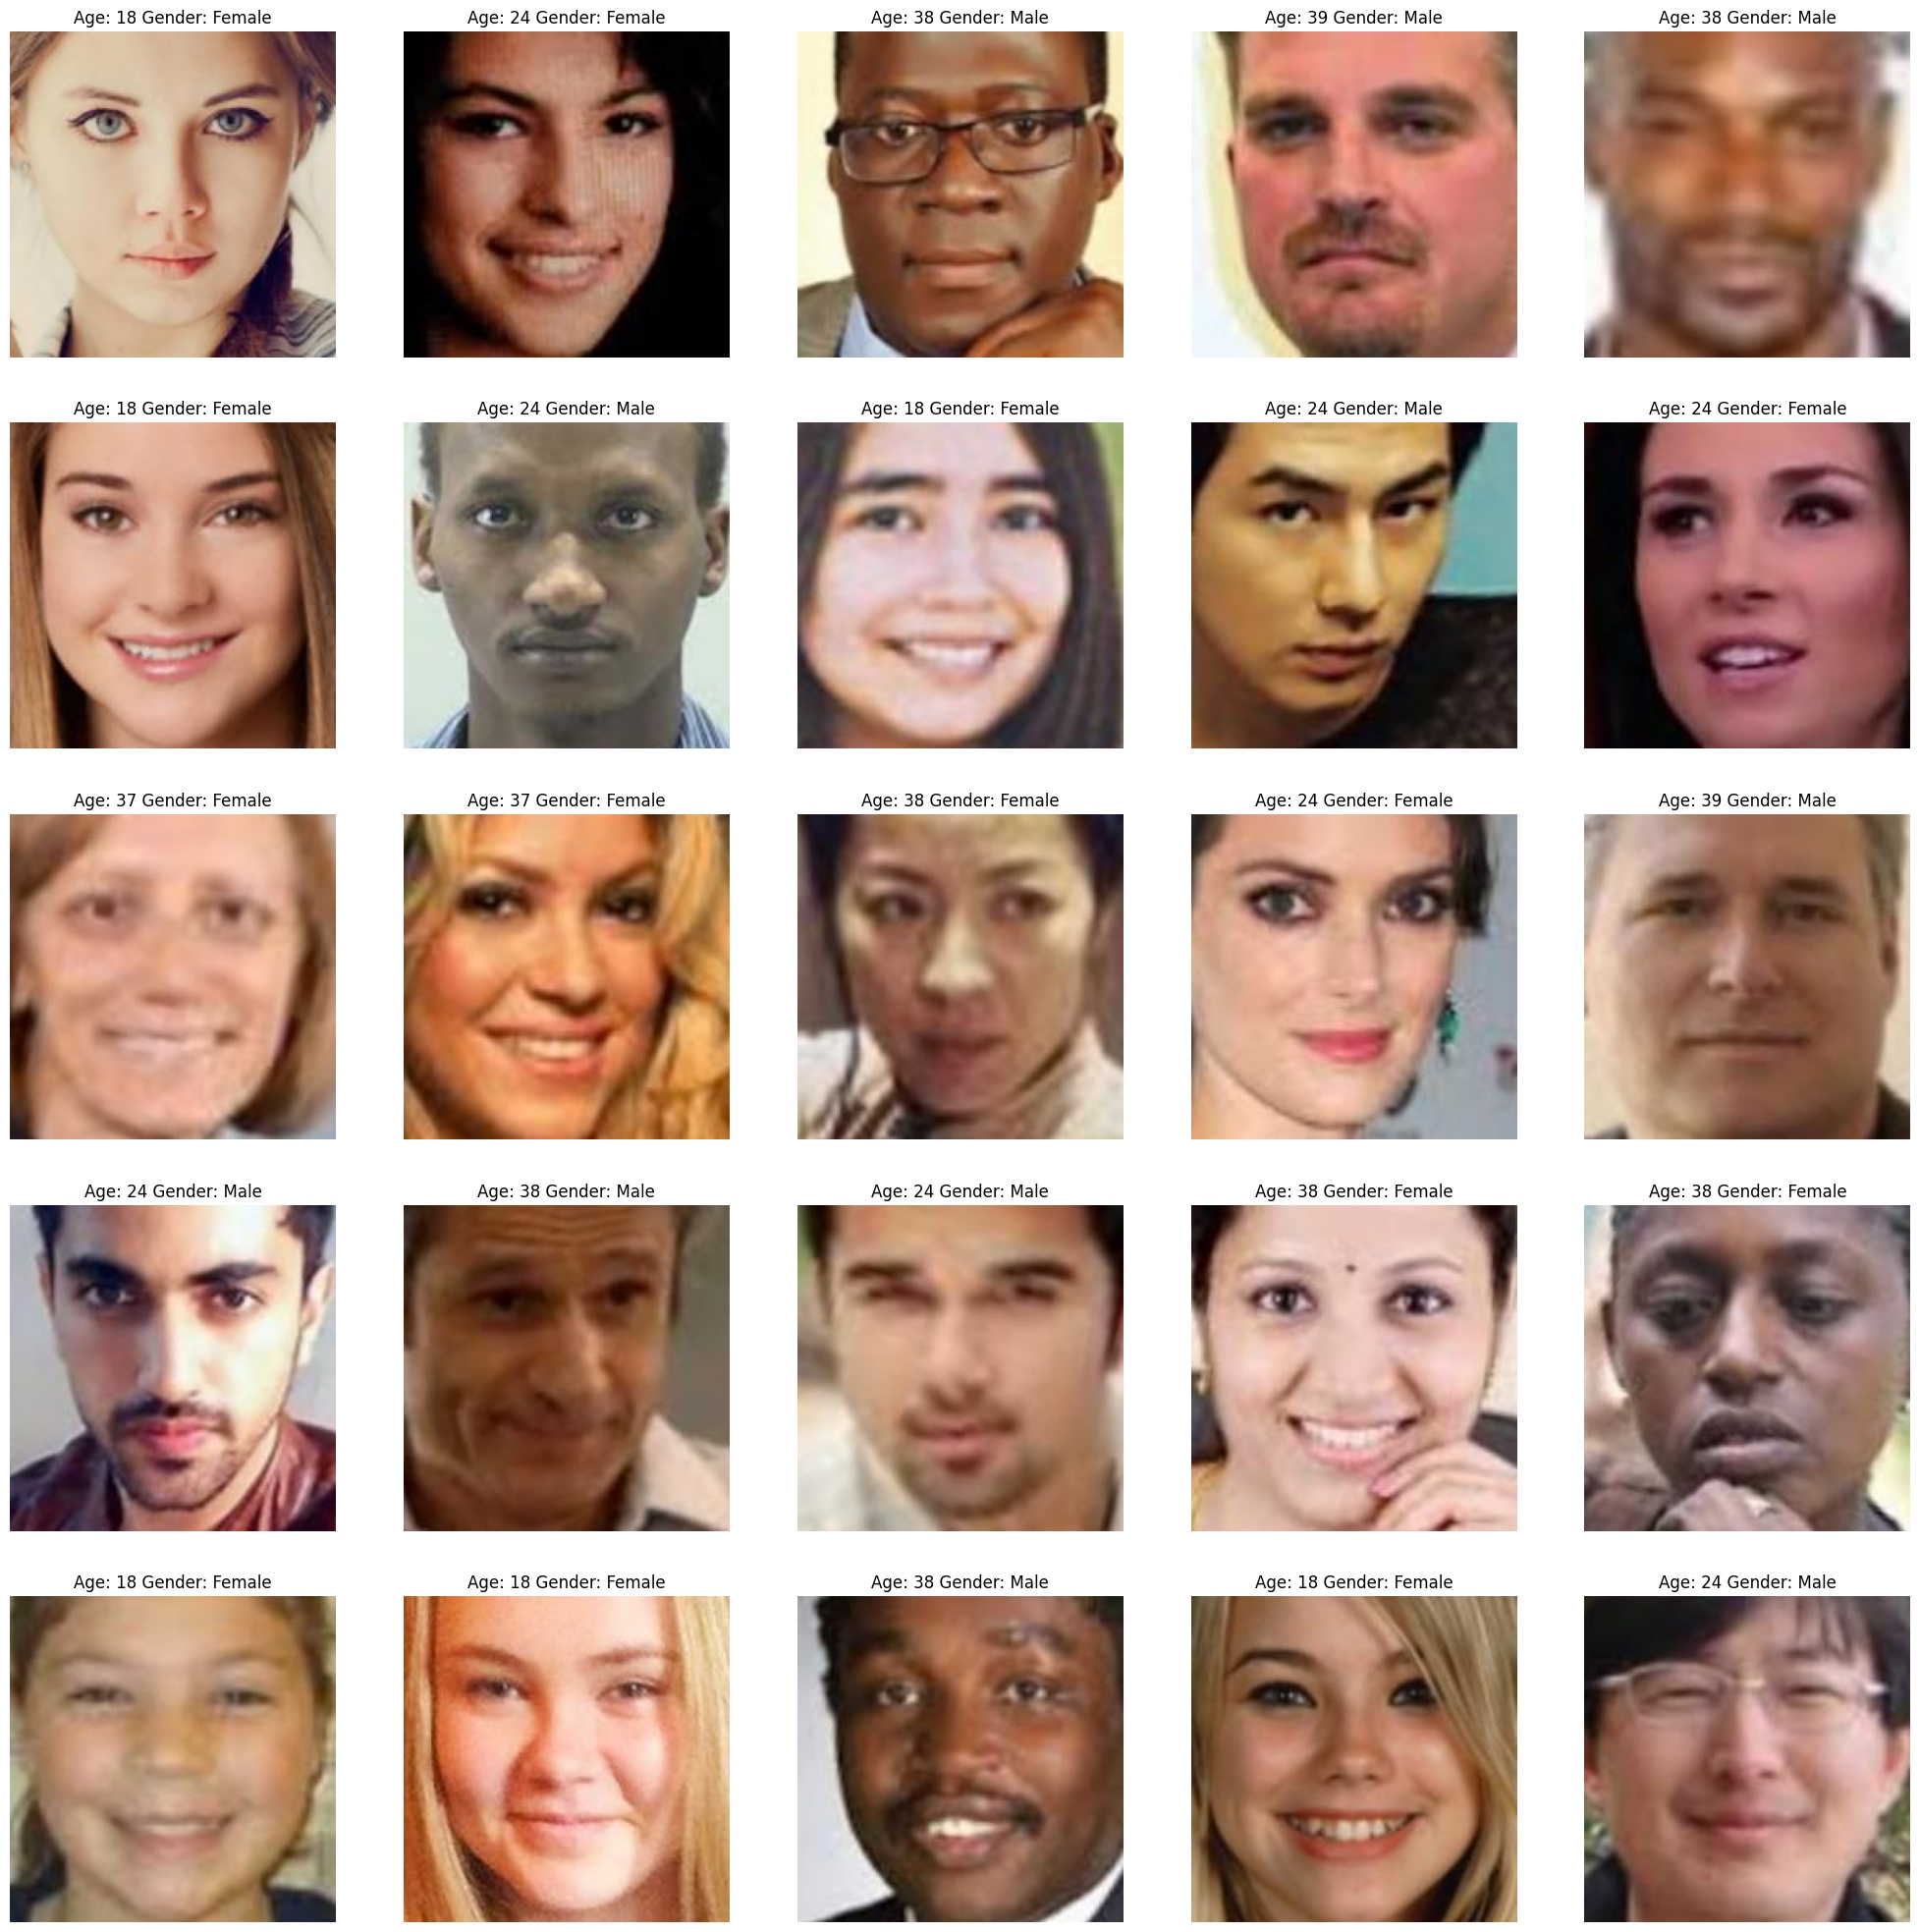

In [ ]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis("off")

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df["image"])

  0%|          | 0/1043 [00:00<?, ?it/s]

In [ ]:
X.shape

(1043, 128, 128, 1)

In [ ]:
X = X/255.0

In [ ]:
y_gender = np.array(df["gender"])
y_age = np.array(df["age"])

In [ ]:
input_shape = (128,128,1)

In [ ]:

inputs = Input(input_shape)
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name="gender_out")(dropout_1)
output_2 = Dense(1, activation='relu', name="age_out")(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=["binary_crossentropy", "mae"], optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

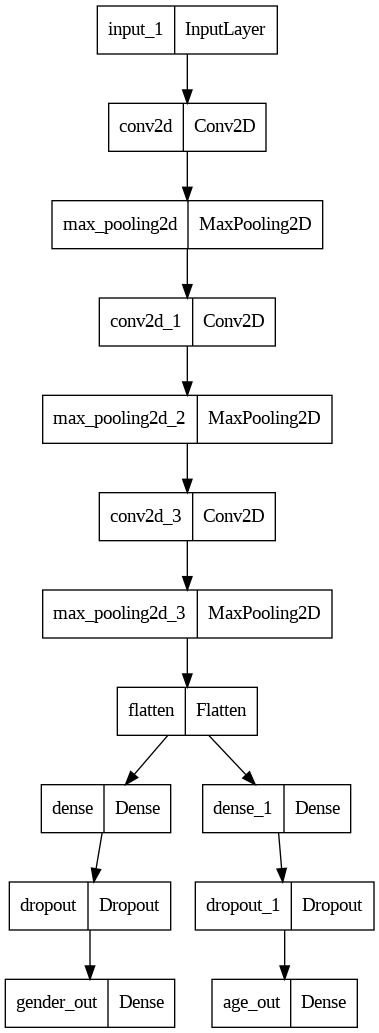

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
27/27 [==============================] - 67s 2s/step - loss: 13.3610 - gender_out_loss: 0.8844 - age_out_loss: 12.4766 - gender_out_accuracy: 0.5743 - age_out_accuracy: 0.0000e+00 - val_loss: 10.8422 - val_gender_out_loss: 0.6461 - val_age_out_loss: 10.1961 - val_gender_out_accuracy: 0.6172 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
27/27 [==============================] - 59s 2s/step - loss: 10.9451 - gender_out_loss: 0.6531 - age_out_loss: 10.2920 - gender_out_accuracy: 0.6199 - age_out_accuracy: 0.0000e+00 - val_loss: 10.8788 - val_gender_out_loss: 0.7035 - val_age_out_loss: 10.1754 - val_gender_out_accuracy: 0.4976 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
27/27 [==============================] - 46s 2s/step - loss: 10.5353 - gender_out_loss: 0.6264 - age_out_loss: 9.9089 - gender_out_accuracy: 0.6703 - age_out_accuracy: 0.0000e+00 - val_loss: 10.2237 - val_gender_out_loss: 0.6729 - val_age_out_loss: 9.5509 - val_gender_out_accuracy: 0.5742 - val_age_out_accuracy:

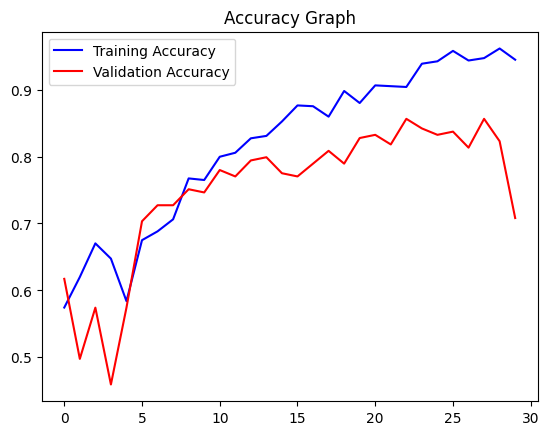

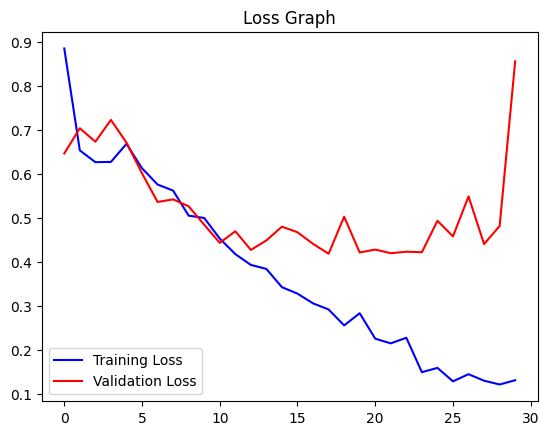

In [ ]:
acc = history.history["gender_out_accuracy"]
val_acc = history.history["val_gender_out_accuracy"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss = history.history["gender_out_loss"]
val_loss = history.history["val_gender_out_loss"]

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.show()

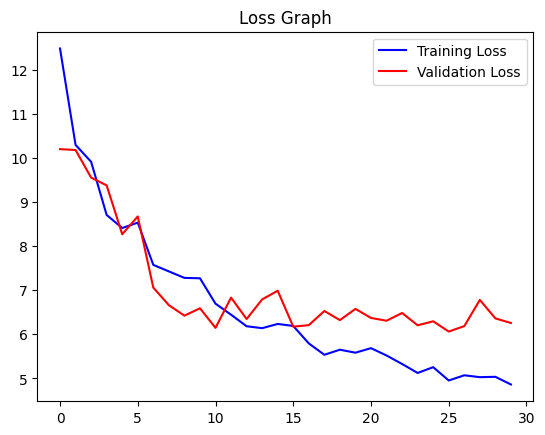

In [ ]:
loss = history.history["age_out_loss"]
val_loss = history.history["val_age_out_loss"]

epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.show()

Original Gender: Female, Original Age: 18
1/1 [==============================] - 0s 67ms/step
Predicted Gender: Female, Predicted Age: 19


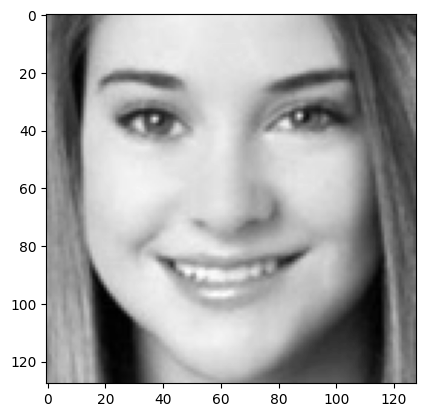

In [ ]:
image_index = 5
print(f"Original Gender: {gender_dict[y_gender[image_index]]}, Original Age: {y_age[image_index]}")
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}")
plt.imshow(X[image_index].reshape(128,128), cmap='gray')

Original Gender: Male, Original Age: 39
1/1 [==============================] - 0s 62ms/step
Predicted Gender: Female, Predicted Age: 38


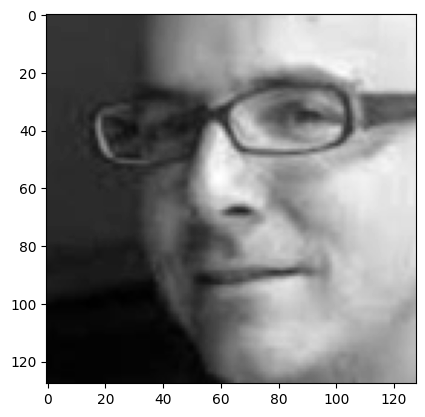

In [ ]:
image_index = 333
print(f"Original Gender: {gender_dict[y_gender[image_index]]}, Original Age: {y_age[image_index]}")
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}")
plt.imshow(X[image_index].reshape(128,128), cmap='gray')

Original Gender: Female, Original Age: 18
1/1 [==============================] - 0s 127ms/step
Predicted Gender: Female, Predicted Age: 21


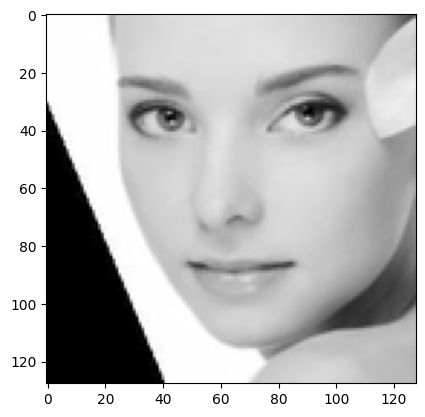

In [ ]:
image_index = 103
print(f"Original Gender: {gender_dict[y_gender[image_index]]}, Original Age: {y_age[image_index]}")
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}")
plt.imshow(X[image_index].reshape(128,128), cmap='gray')

In [ ]:
model.save("model.h5")


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import numpy as np

# Assuming these variables are defined:
# - model: Trained gender and age prediction model
# - X: Input data
# - y_gender: Gender labels
# - y_age: Age labels

# Assuming you already have a trained model and data
# Make predictions
y_gender_pred, y_age_pred = model.predict(X)

# Convert predictions to discrete classes
y_gender_pred = np.round(y_gender_pred)
y_age_pred = np.round(y_age_pred)

# Gender metrics
print("Gender Metrics:")
print("Accuracy:", accuracy_score(y_gender, y_gender_pred))
print("Precision:", precision_score(y_gender, y_gender_pred, average='weighted'))
print("Recall:", recall_score(y_gender, y_gender_pred, average='weighted'))
print("Classification Report:")
print(classification_report(y_gender, y_gender_pred))

# Age metrics
print("\nAge Metrics:")
print("Accuracy:", accuracy_score(y_age, y_age_pred))
print("Precision:", precision_score(y_age, y_age_pred, average='weighted'))
print("Recall:", recall_score(y_age, y_age_pred, average='weighted'))
print("Classification Report:")
print(classification_report(y_age, y_age_pred))


33/33 [==============================] - 24s 722ms/step
Gender Metrics:
Accuracy: 0.8302972195589645
Precision: 0.8704650570231183
Recall: 0.8302972195589645
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       543
           1       0.74      0.99      0.85       500

    accuracy                           0.83      1043
   macro avg       0.87      0.84      0.83      1043
weighted avg       0.87      0.83      0.83      1043


Age Metrics:
Accuracy: 0.09204218600191755
Precision: 0.5239162187218074
Recall: 0.09204218600191755
Classification Report:
              precision    recall  f1-score   support

        12.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       1.00      0.03      0.06       185
        19.0       0.00      0.00      0.0

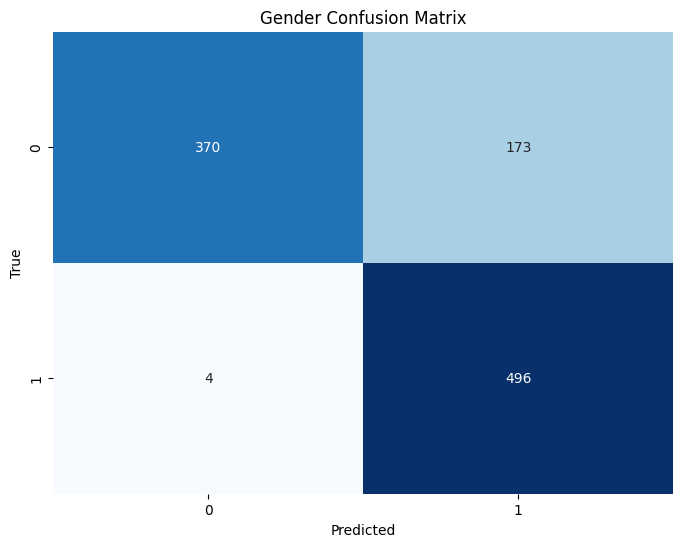

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming these variables are defined:
# - y_gender: True gender labels
# - y_age: True age labels
# - y_gender_pred: Predicted gender labels
# - y_age_pred: Predicted age labels

# Gender confusion matrix
cm_gender = confusion_matrix(y_gender, y_gender_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gender, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



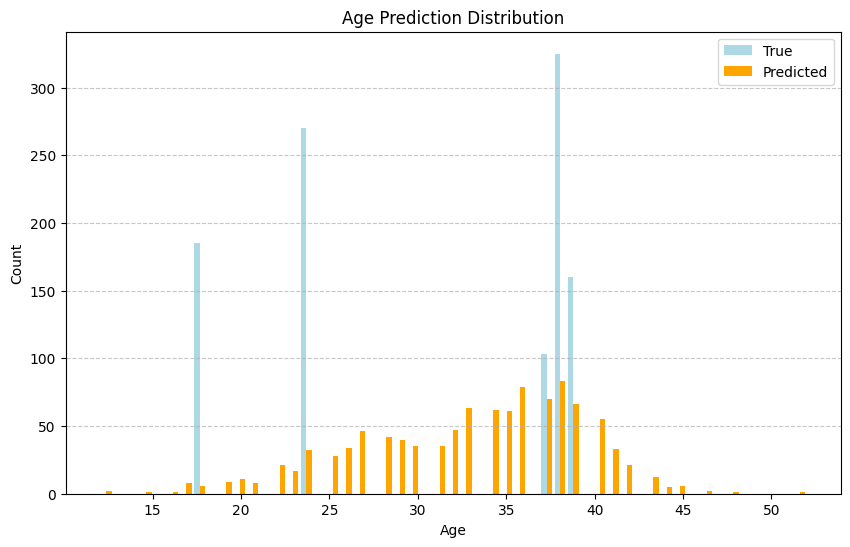

In [ ]:
import matplotlib.pyplot as plt

# Assuming these variables are defined:
# - y_age: True age labels
# - y_age_pred: Predicted age labels

# Flatten the arrays
y_age_flat = y_age.flatten()
y_age_pred_flat = y_age_pred.flatten()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist([y_age_flat, y_age_pred_flat], bins=max(max(y_age_flat), max(y_age_pred_flat)) + 1, color=['lightblue', 'orange'], label=['True', 'Predicted'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Prediction Distribution')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
